In [7]:
from keras.utils import to_categorical
import cv2
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np
import os

In [16]:
TRAIN_DIR = '/kaggle/input/face-expression-recognition-dataset/images/train'
TEST_DIR = '/kaggle/input/face-expression-recognition-dataset/images/validation'

In [12]:
def createdataframe(dir):
    image_paths =[]
    labels =[]
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir, label)):
            image_path = os.path.join(dir, label, imagename)

            # Load the image using OpenCV
            img = cv2.imread(image_path)

            # Convert BGR to RGB (OpenCV loads images in BGR format)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            image_paths.append(img)  # Append the image data directly
            labels.append(label)
        print(label, "completed")
    return image_paths, labels

In [13]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

surprise completed
fear completed
angry completed
neutral completed
sad completed
disgust completed
happy completed


In [14]:
print(train)

                                                   image     label
0      [[[252, 252, 252], [255, 255, 255], [253, 253,...  surprise
1      [[[253, 253, 253], [255, 255, 255], [253, 253,...  surprise
2      [[[204, 204, 204], [107, 107, 107], [138, 138,...  surprise
3      [[[215, 215, 215], [215, 215, 215], [218, 218,...  surprise
4      [[[28, 28, 28], [33, 33, 33], [33, 33, 33], [3...  surprise
...                                                  ...       ...
28816  [[[230, 230, 230], [230, 230, 230], [204, 204,...     happy
28817  [[[75, 75, 75], [87, 87, 87], [159, 159, 159],...     happy
28818  [[[33, 33, 33], [17, 17, 17], [23, 23, 23], [4...     happy
28819  [[[24, 24, 24], [29, 29, 29], [36, 36, 36], [3...     happy
28820  [[[249, 249, 249], [235, 235, 235], [46, 46, 4...     happy

[28821 rows x 2 columns]


In [17]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

surprise completed
fear completed
angry completed
neutral completed
sad completed
disgust completed
happy completed


In [18]:
print(test)
print(test['image'])

                                                  image     label
0     [[[255, 255, 255], [252, 252, 252], [249, 249,...  surprise
1     [[[31, 31, 31], [37, 37, 37], [42, 42, 42], [5...  surprise
2     [[[69, 69, 69], [114, 114, 114], [207, 207, 20...  surprise
3     [[[253, 253, 253], [255, 255, 255], [244, 244,...  surprise
4     [[[49, 49, 49], [40, 40, 40], [29, 29, 29], [4...  surprise
...                                                 ...       ...
7061  [[[93, 93, 93], [97, 97, 97], [127, 127, 127],...     happy
7062  [[[222, 222, 222], [178, 178, 178], [111, 111,...     happy
7063  [[[51, 51, 51], [140, 140, 140], [29, 29, 29],...     happy
7064  [[[223, 223, 223], [222, 222, 222], [221, 221,...     happy
7065  [[[83, 83, 83], [102, 102, 102], [110, 110, 11...     happy

[7066 rows x 2 columns]
0       [[[255, 255, 255], [252, 252, 252], [249, 249,...
1       [[[31, 31, 31], [37, 37, 37], [42, 42, 42], [5...
2       [[[69, 69, 69], [114, 114, 114], [207, 207, 20...
3       [

In [19]:
from tqdm.notebook import tqdm

In [25]:
def extract_features(images):
    features = []
    for img in tqdm(images):
        # Convert RGB to grayscale (if needed)
        if len(img.shape) == 3:  # Check if the image is in color (RGB)
            img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [26]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

In [27]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [28]:
x_train = train_features/255.0
x_test = test_features/255.0

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [31]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [32]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [33]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.2388 - loss: 1.8388 - val_accuracy: 0.2583 - val_loss: 1.8119
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.2456 - loss: 1.8111 - val_accuracy: 0.2659 - val_loss: 1.7515
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.2816 - loss: 1.7362 - val_accuracy: 0.3709 - val_loss: 1.5772
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.3677 - loss: 1.5969 - val_accuracy: 0.4472 - val_loss: 1.4137
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.4173 - loss: 1.4859 - val_accuracy: 0.4844 - val_loss: 1.3387
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.4481 - loss: 1.4163 - val_accuracy: 0.4976 - val_loss: 1.3134
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.4672 - loss: 1.3861 - val_accuracy: 0.5137 - val_loss: 1.2552
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.4765 - loss: 1.3409 -

In [40]:
model_json = model.to_json()
with open("/kaggle/working/emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("/kaggle/working/emotiondetector.h5")

In [38]:
from keras.models import model_from_json

In [41]:
json_file = open("/kaggle/working/emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("/kaggle/working/emotiondetector.h5")

In [42]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [49]:
def ef(image):
    # Convert RGB to grayscale (if needed)
    if len(image.shape) == 3:  # Check if the image is in color (RGB)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    feature = np.array(image)
    feature = feature.reshape(1, 48, 48, 1)
    return feature

In [51]:
image_path = '/kaggle/input/face-expression-recognition-dataset/images/train/sad/10006.jpg'
print("Original image is of sad")

# Load the image using OpenCV
img = cv2.imread(image_path)

# Convert BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = ef(img)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is ", pred_label)

Original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
Model prediction is  angry


In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

Original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Model prediction is  angry


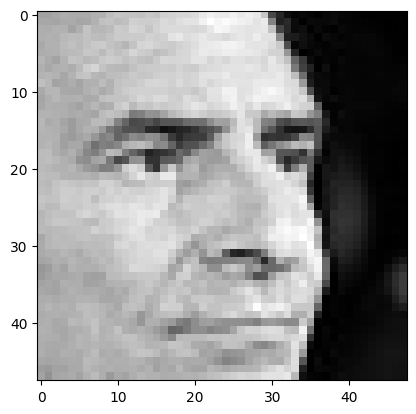

In [55]:
image_path = '/kaggle/input/face-expression-recognition-dataset/images/train/sad/10006.jpg'
print("Original image is of sad")

# Load the image using OpenCV
img = cv2.imread(image_path)

# Convert BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = ef(img)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is ", pred_label)

plt.imshow(img.reshape(48, 48), cmap='gray')
plt.show()

Original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Model prediction is  sad


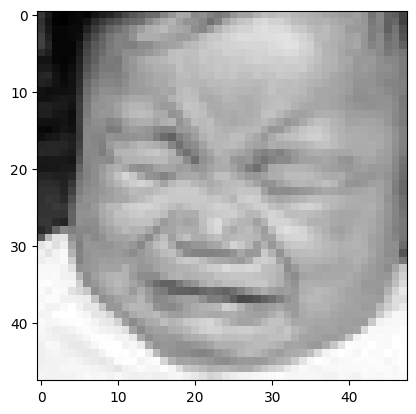

In [58]:
image_path = '/kaggle/input/face-expression-recognition-dataset/images/validation/sad/10176.jpg'
print("Original image is of sad")

# Load the image using OpenCV
img = cv2.imread(image_path)

# Convert BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = ef(img)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is ", pred_label)

plt.imshow(img.reshape(48, 48), cmap='gray')
plt.show()

Original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Model prediction is  sad


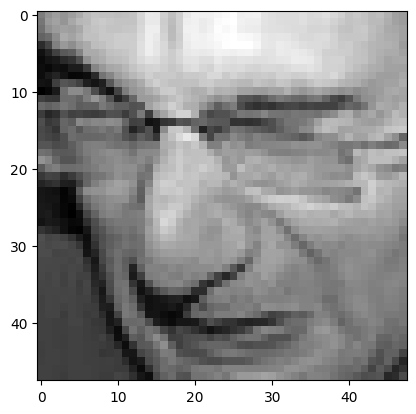

In [61]:
image_path = '/kaggle/input/face-expression-recognition-dataset/images/validation/disgust/10053.jpg'
print("Original image is of disgust")

# Load the image using OpenCV
img = cv2.imread(image_path)

# Convert BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = ef(img)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is ", pred_label)

plt.imshow(img.reshape(48, 48), cmap='gray')
plt.show()

Original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Model prediction is  sad


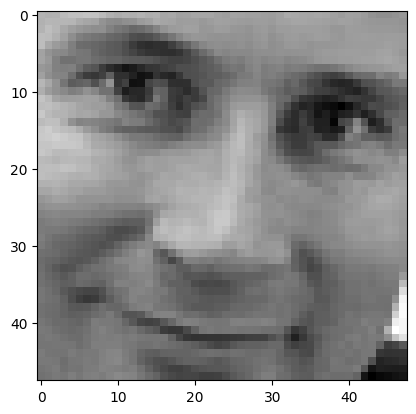

In [62]:
image_path = '/kaggle/input/face-expression-recognition-dataset/images/validation/happy/10019.jpg'
print("Original image is of happy")

# Load the image using OpenCV
img = cv2.imread(image_path)

# Convert BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = ef(img)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is ", pred_label)

plt.imshow(img.reshape(48, 48), cmap='gray')
plt.show()

Original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Model prediction is  happy


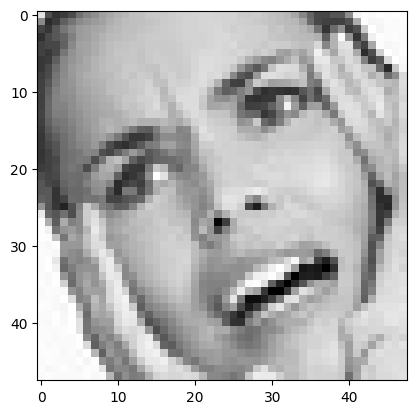

In [63]:
image_path = '/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/10909.jpg'
print("Original image is of surprise")

# Load the image using OpenCV
img = cv2.imread(image_path)

# Convert BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = ef(img)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is ", pred_label)

plt.imshow(img.reshape(48, 48), cmap='gray')
plt.show()